<a href="https://colab.research.google.com/github/JunaidLamture/CodeClause_Internship_Data_Science/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
pip install opendatasets


In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/kartik2112/fraud-detection")

Skipping, found downloaded files in "./fraud-detection" (use force=True to force download)


# **1-Read a data**

In [4]:
train_data = pd.read_csv("/content/fraud-detection/fraudTrain.csv")


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [7]:
train_data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [8]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

# **2-Preprocessing**

In [9]:
train_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,37.7175,-112.4777,258,Geoscientist,1371816728,36.841266,-111.690765,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,39.2667,-77.5101,100,"Production assistant, television",1371816739,38.906881,-78.246528,0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,32.9396,-105.8189,899,Naval architect,1371816752,33.619513,-105.130529,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,43.3526,-102.5411,1126,Volunteer coordinator,1371816816,42.788940,-103.241160,0


In [10]:
#Drop all rows that contain missing values
train_data.dropna(ignore_index=True)
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,37.7175,-112.4777,258,Geoscientist,1371816728,36.841266,-111.690765,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,39.2667,-77.5101,100,"Production assistant, television",1371816739,38.906881,-78.246528,0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,32.9396,-105.8189,899,Naval architect,1371816752,33.619513,-105.130529,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,43.3526,-102.5411,1126,Volunteer coordinator,1371816816,42.788940,-103.241160,0


In [11]:
train_data.dropna(ignore_index=True)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,37.7175,-112.4777,258,Geoscientist,1371816728,36.841266,-111.690765,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,39.2667,-77.5101,100,"Production assistant, television",1371816739,38.906881,-78.246528,0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,32.9396,-105.8189,899,Naval architect,1371816752,33.619513,-105.130529,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,43.3526,-102.5411,1126,Volunteer coordinator,1371816816,42.788940,-103.241160,0


In [12]:
encoder = LabelEncoder()
train_data["merchant"] = encoder.fit_transform(train_data["merchant"])
train_data["category"] = encoder.fit_transform(train_data["category"])
train_data["gender"] = encoder.fit_transform(train_data["gender"])
train_data["job"] = encoder.fit_transform(train_data["job"])

In [13]:
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,0,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0
1,241,4,107.23,0,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0
2,390,0,220.11,1,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0
3,360,2,45.00,1,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,0
4,297,9,41.96,1,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,499,0,15.56,1,37.7175,-112.4777,258,215,1371816728,36.841266,-111.690765,0
1296671,2,1,51.70,1,39.2667,-77.5101,100,360,1371816739,38.906881,-78.246528,0
1296672,599,1,105.93,1,32.9396,-105.8189,899,308,1371816752,33.619513,-105.130529,0
1296673,509,1,74.90,1,43.3526,-102.5411,1126,485,1371816816,42.788940,-103.241160,0


# **3-EDA**

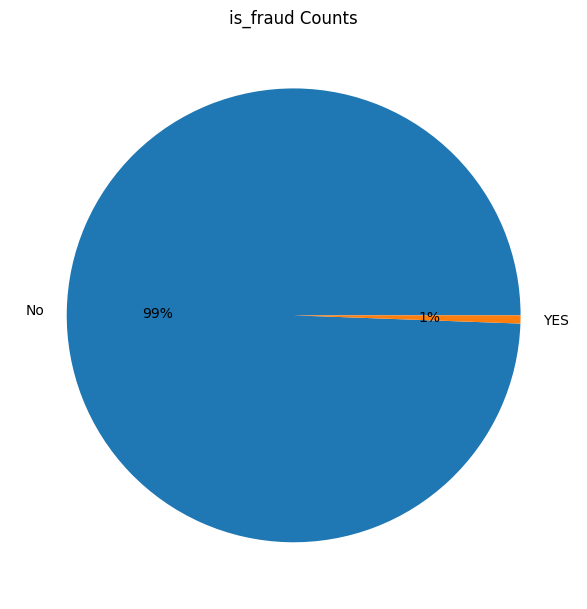

In [14]:
exit_counts = train_data["is_fraud"].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(exit_counts, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# **4-Train the Model**

In [15]:
X = train_data.drop(columns=["is_fraud"], inplace = False)
Y = train_data["is_fraud"]

In [ ]:
model = SVC()
model.fit(X, Y)

In [ ]:
model.score(X, Y)

# **4-Test the model**

In [ ]:
test_data = pd.read_csv("/content/fraud-detection/fraudTest.csv")
test_data

In [ ]:
test_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
test_data

In [ ]:
encoder = LabelEncoder()
test_data["merchant"] = encoder.fit_transform(test_data["merchant"])
test_data["category"] = encoder.fit_transform(test_data["category"])
test_data["gender"] = encoder.fit_transform(test_data["gender"])
test_data["job"] = encoder.fit_transform(test_data["job"])

In [ ]:
test_data

In [ ]:
X_test = test_data.drop(columns=["is_fraud"], inplace = False)
Y_test = test_data["is_fraud"]

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
accuracy = accuracy_score(test_data['is_fraud'],y_pred)
accuracy